###  ___ANOVA___ ___and___ ___QQPlot___

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df.shape

(1000, 8)

In [53]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [54]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [55]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


from our data summary we can see that there are no null values indicating we are working with a clean dataset. Additionally, the score in math.reading,and writing contain very similar averages

In [56]:
# Function for distribution pairplot 

def distribution(dataset,variable):
    '''
    Args:
        dataset: Include the DataFrame here
        variable: Include the column from dataframe used for color encoding
    Returns:
        sns pairplot with color encoding 
    '''

    g = sns.pairplot(data=dataset,hue=variable)
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable),fontsize=20) # suptitle() <super title> sets title to the entire fig.
    g.fig.subplots_adjust(top=0.9)
    return g

In [57]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


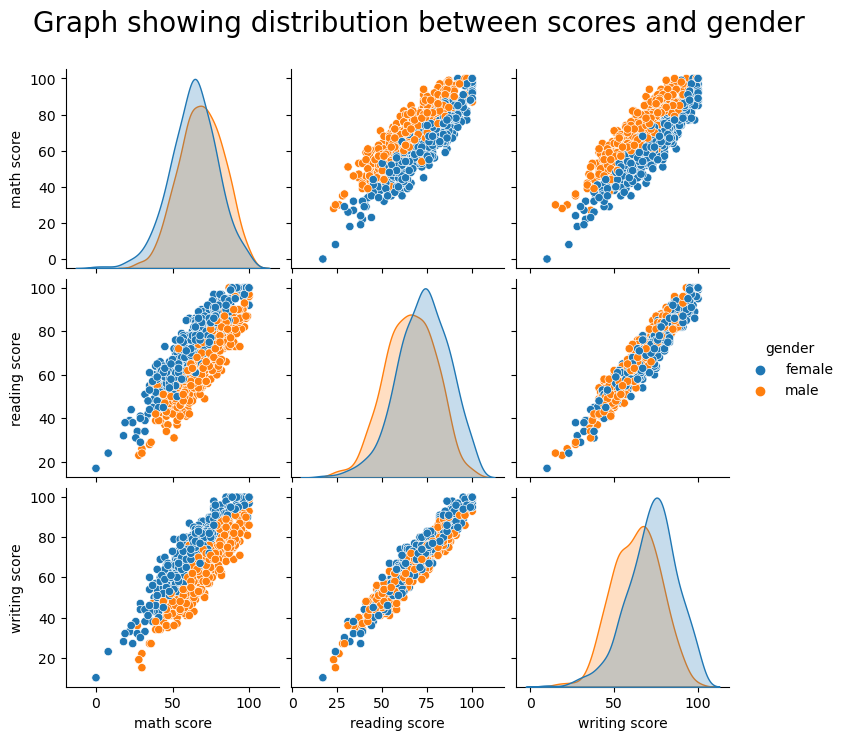

In [58]:
distribution(df,'gender');mm     

* x-axis - distribution shows scores [ low to left - mean - high to right ] 
* y axis - shows the density of population 

Femlale perform higher in reading / writing while males perform higher in maths

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


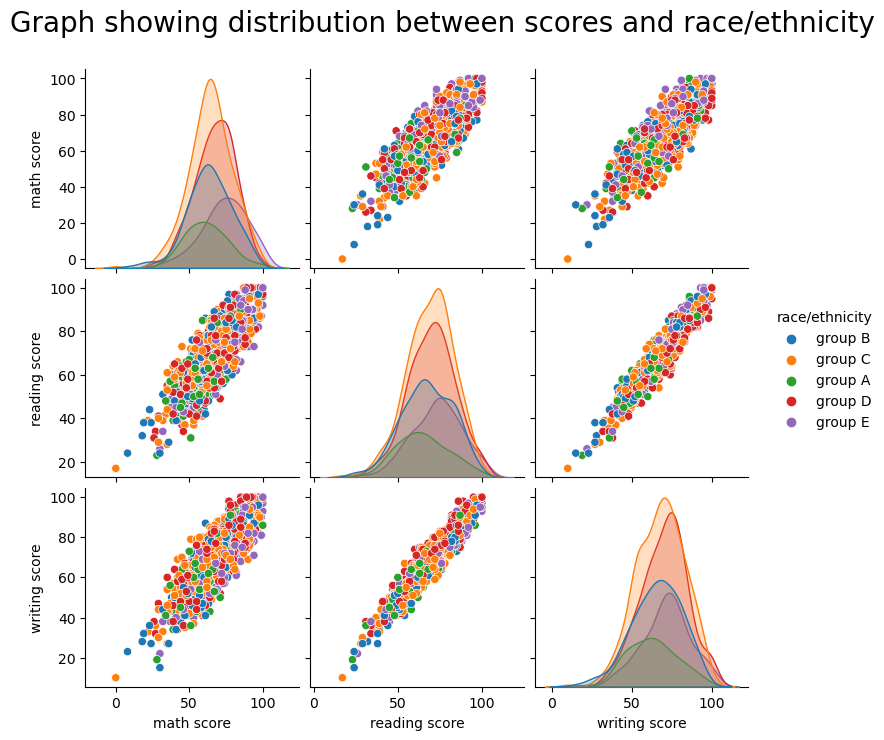

In [59]:
# Score and race 
distribution(df,'race/ethnicity')
plt.show()

* x-axis - distribution shows scores [ low to left - mean - high to right ] 
* y axis - shows the density of population 

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


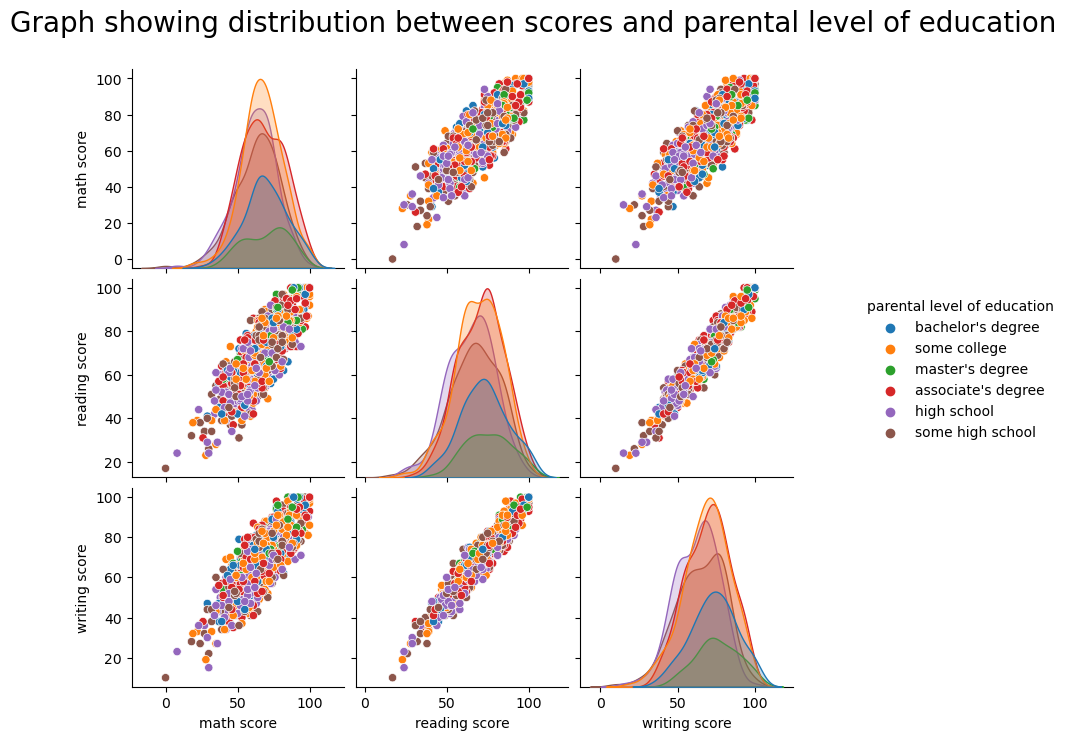

In [60]:
#score and parental education 
distribution(df,'parental level of education')
plt.show()

There appears to be a trend in parental education level and students score.


/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


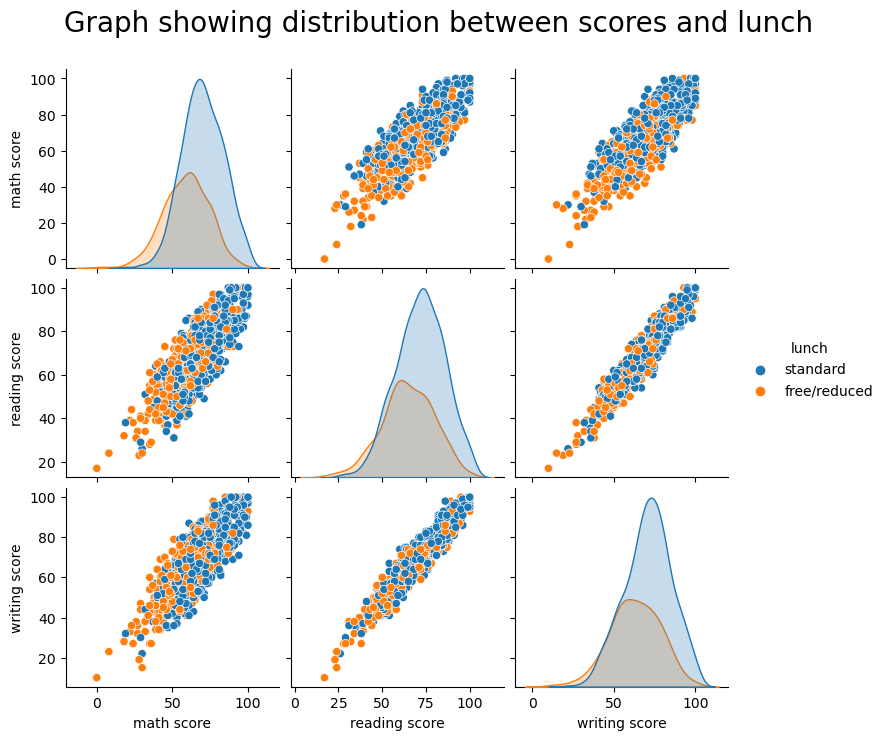

In [61]:
# score and lunch
distribution(df,'lunch')
plt.show()

students who ate the standard lunch on average tested higher in all three subjects

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


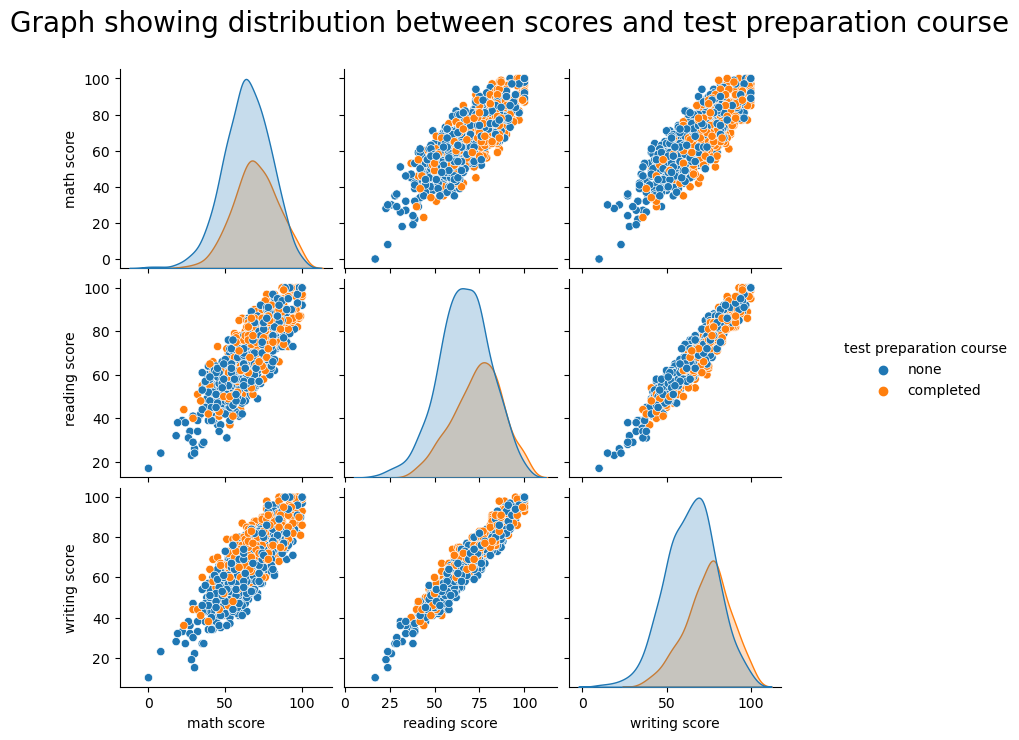

In [62]:
distribution(df,'test preparation course')
plt.show()

### 1 Way ANOVA Hypothesis:

* H0 = There is no diff between groups and Equality mean 
* h1 = There is diff between groups and Equality mean

In [63]:
#clean up column names for StatsModel
df.columns = ['gender','race','parental_edu','lunch','test_prep_course','math_score','reading_score','writing_score']
df.head()

,gender,race,parental_edu,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [64]:
#Create ANOVA test function 
def anova_test(data,variable):
    '''
    Args:
        data: (DataFrame) 
        variable: Categorical Columns used for 1 way anova test
    Returns:
        Nothing
    '''

    x = ['math_score','reading_score','writing_score']
    for i,k in enumerate(x):
        lm = ols("{}~{}".format(x[i],variable),data=data).fit()
        table = sm.stats.anova_lm(lm)
        print(f'P-value for 1-way ANOVA test between {x[i]} and {variable}',table.loc[variable,'PR(>F)'])

In [65]:
# Gender ANOVA
anova_test(df,'gender')

P-value for 1-way ANOVA test between math_score and gender 9.120185549334522e-08
P-value for 1-way ANOVA test between reading_score and gender 4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender 2.0198777068682407e-22


the p-values are below 0.05 indicating we can reject the null hypothesis.This conformation shows us there is statistical corrlation between test scores and gender 

In [66]:
# Parental education ANOVA
anova_test(df,'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu 5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_edu 1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_edu 1.1202799969774331e-13


the p-values are below 0.05 indicating we can reject the null hypothesis.This conformation shows us there is statistical corrlation between test scores and parental education

In [67]:
# Parental education ANOVA
anova_test(df,'lunch')

P-value for 1-way ANOVA test between math_score and lunch 2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch 2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch 3.1861895831680456e-15


the p-values are below 0.05 indicating we can reject the null hypothesis.This conformation shows us there is statistical corrlation between test scores and luch

Although we saw statistical significance on parental level of education and student's score, our pairplot showed us difference was almost negligable. we will use a count plot below to take a further look at this data

<Axes: xlabel='parental_edu', ylabel='count'>

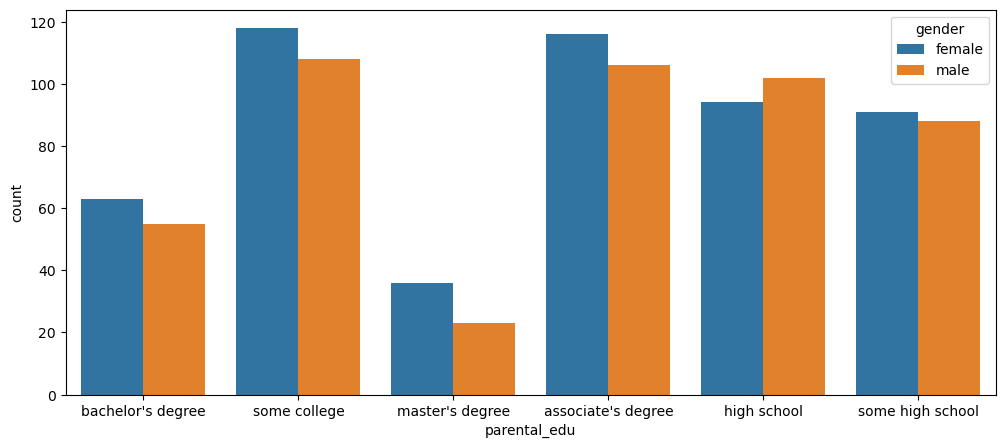

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x = 'parental_edu' , hue='gender')


#### Conclusion :

* Females perform higher in reading and writing subjects.
* Male performs higher in math.
* Parental education level has negligible differenece in students test performance. 
* Students who ate standard lunch testesd higher than those who ate a free/reduced meal
* Students who colmpleted test preparation course scored higher than those who did not
* All cotegorical data was statistically tested against the exam scores using one way Anova test. This test allows us to accurately conform wether a category of data is correlated to numerical outcomes. Using a 95% CI (Confidence) we achieved P-values < 0.05 for each category of data. This allows us ot reject our null hypothesis and summerize that the categotical data in this dataset is correlated to reading and writing math score
 